In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from mpol.gridding import DirtyImager
from mpol import coordinates
from astropy.visualization import ImageNormalize, AsinhStretch
from scipy.stats import binned_statistic_2d
plt.rcParams["figure.dpi"] = 500

In [8]:
data = np.load("../../HTLup_continuum2.npz")
u = data["uu"] # kLambda
v = data["vv"] # kLambda
vis = data["data"] # Jansky 
weight = data["weight"] # = 1/sigma^2

Text(0.5, 1.0, 'Baselines')

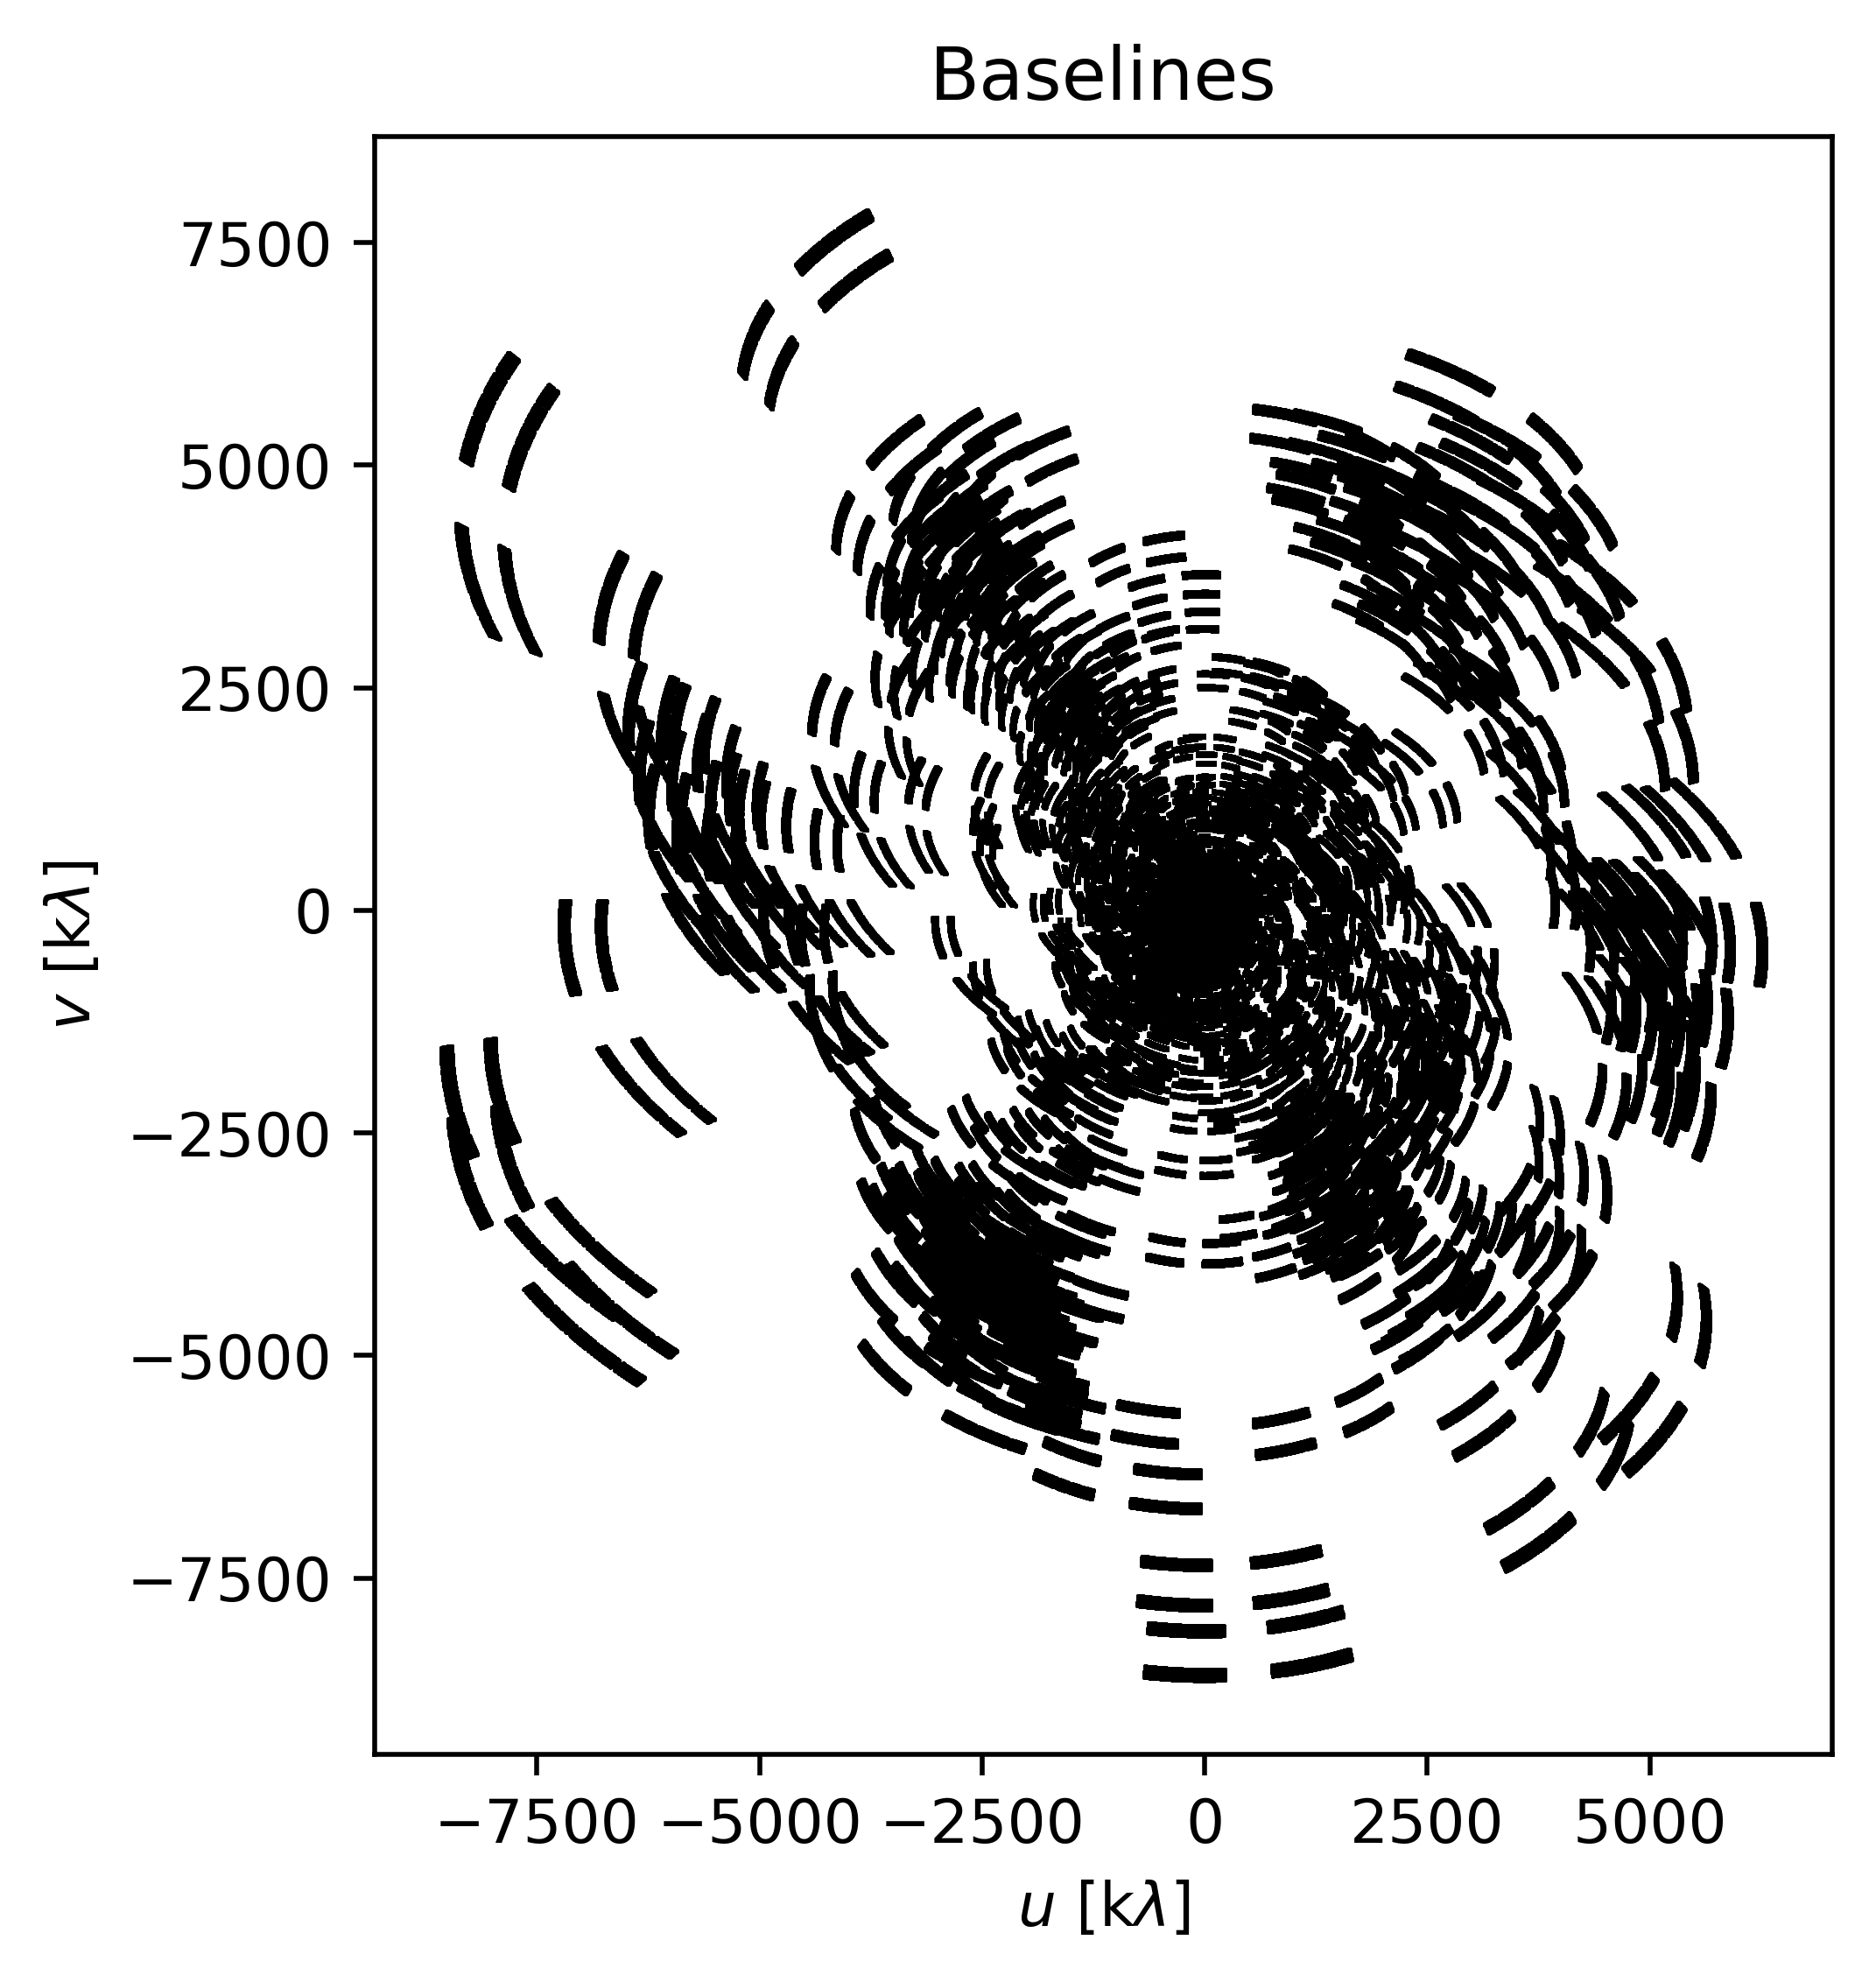

In [9]:
fig, ax = plt.subplots(nrows=1)
ax.scatter(u, v, s=0.5, rasterized=True, linewidths=0.0, c="k")
#ax.scatter(-u, -v, s=0.5, rasterized=True, linewidths=0.0, c="k")
ax.set_xlabel(r"$u$ [k$\lambda$]")
ax.set_ylabel(r"$v$ [k$\lambda$]")
ax.set_aspect("equal")
ax.set_title("Baselines")

255621.0


c:\Users\noedi\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\noedi\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


83296.0
29731.0
9490.0
4606.0


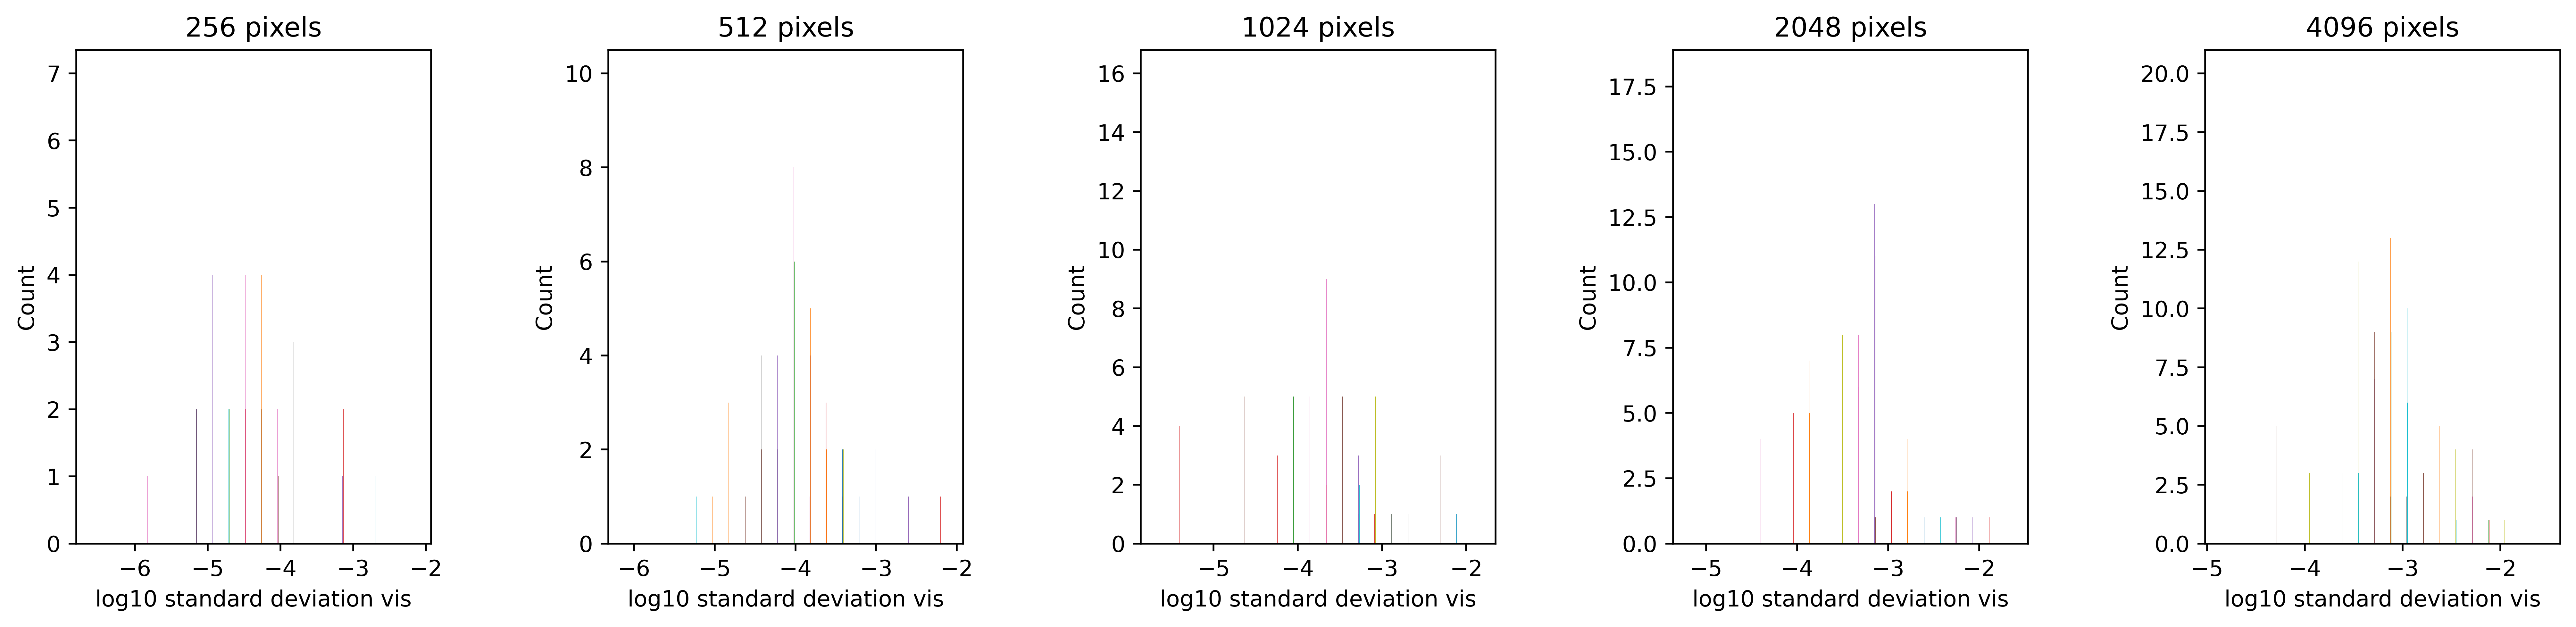

In [24]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
pixel_scale = 0.0015 # arcsec
for i, npix in enumerate([256, 512, 1024, 2048, 4096]):
    coords = coordinates.GridCoords(cell_size=pixel_scale, npix=npix)
    bin_x = coords.u_edges
    bin_y = coords.v_edges
    std_bin_real, edgex, edgey, binumber = binned_statistic_2d(u, v, vis_real, "std", (bin_x, bin_y))
    std_bin_imag, edgex, edgey, binumber = binned_statistic_2d(u, v, vis_imag,  "std", (bin_x, bin_y))

    count, *_ = binned_statistic_2d(u, v, vis_real, "count", (bin_x, bin_y))
    print(count.max())

    std_real = std_bin_real / (count + 1)
    std_imag = std_bin_imag / (count + 1)

    std_real = std_real.mean(axis = 0)
    std_imag = std_imag.mean(axis = 0)
    
    axs[i].hist(np.log10(std_real), bins=20)
    axs[i].set_ylabel("Count")
    axs[i].set_xlabel("log10 standard deviation vis")
    axs[i].set_title(f"{npix} pixels")
    #print(std_real)
plt.subplots_adjust(wspace = 0.5)

In [23]:
ravel()

NameError: name 'ravel' is not defined

In [26]:
npix = 512
coords = coordinates.GridCoords(cell_size=pixel_scale, npix=npix)
bin_x = coords.u_edges
bin_y = coords.v_edges
std_bin_real, edgex, edgey, binumber = binned_statistic_2d(u, v, vis_real, "std", (bin_x, bin_y))
std_bin_imag, edgex, edgey, binumber = binned_statistic_2d(u, v, vis_imag,  "std", (bin_x, bin_y))
count, *_ = binned_statistic_2d(u, v, vis_real, "count", (bin_x, bin_y))

std_bin_real[np.isnan(std_bin_real)] = 0

(array([  22.,  192.,  649., 1752., 3443., 4686., 3151., 1264.,  578.,
          53.]),
 array([-4.86918586, -4.53595493, -4.202724  , -3.86949307, -3.53626214,
        -3.20303121, -2.86980028, -2.53656935, -2.20333842, -1.87010749,
        -1.53687656]),
 <BarContainer object of 10 artists>)

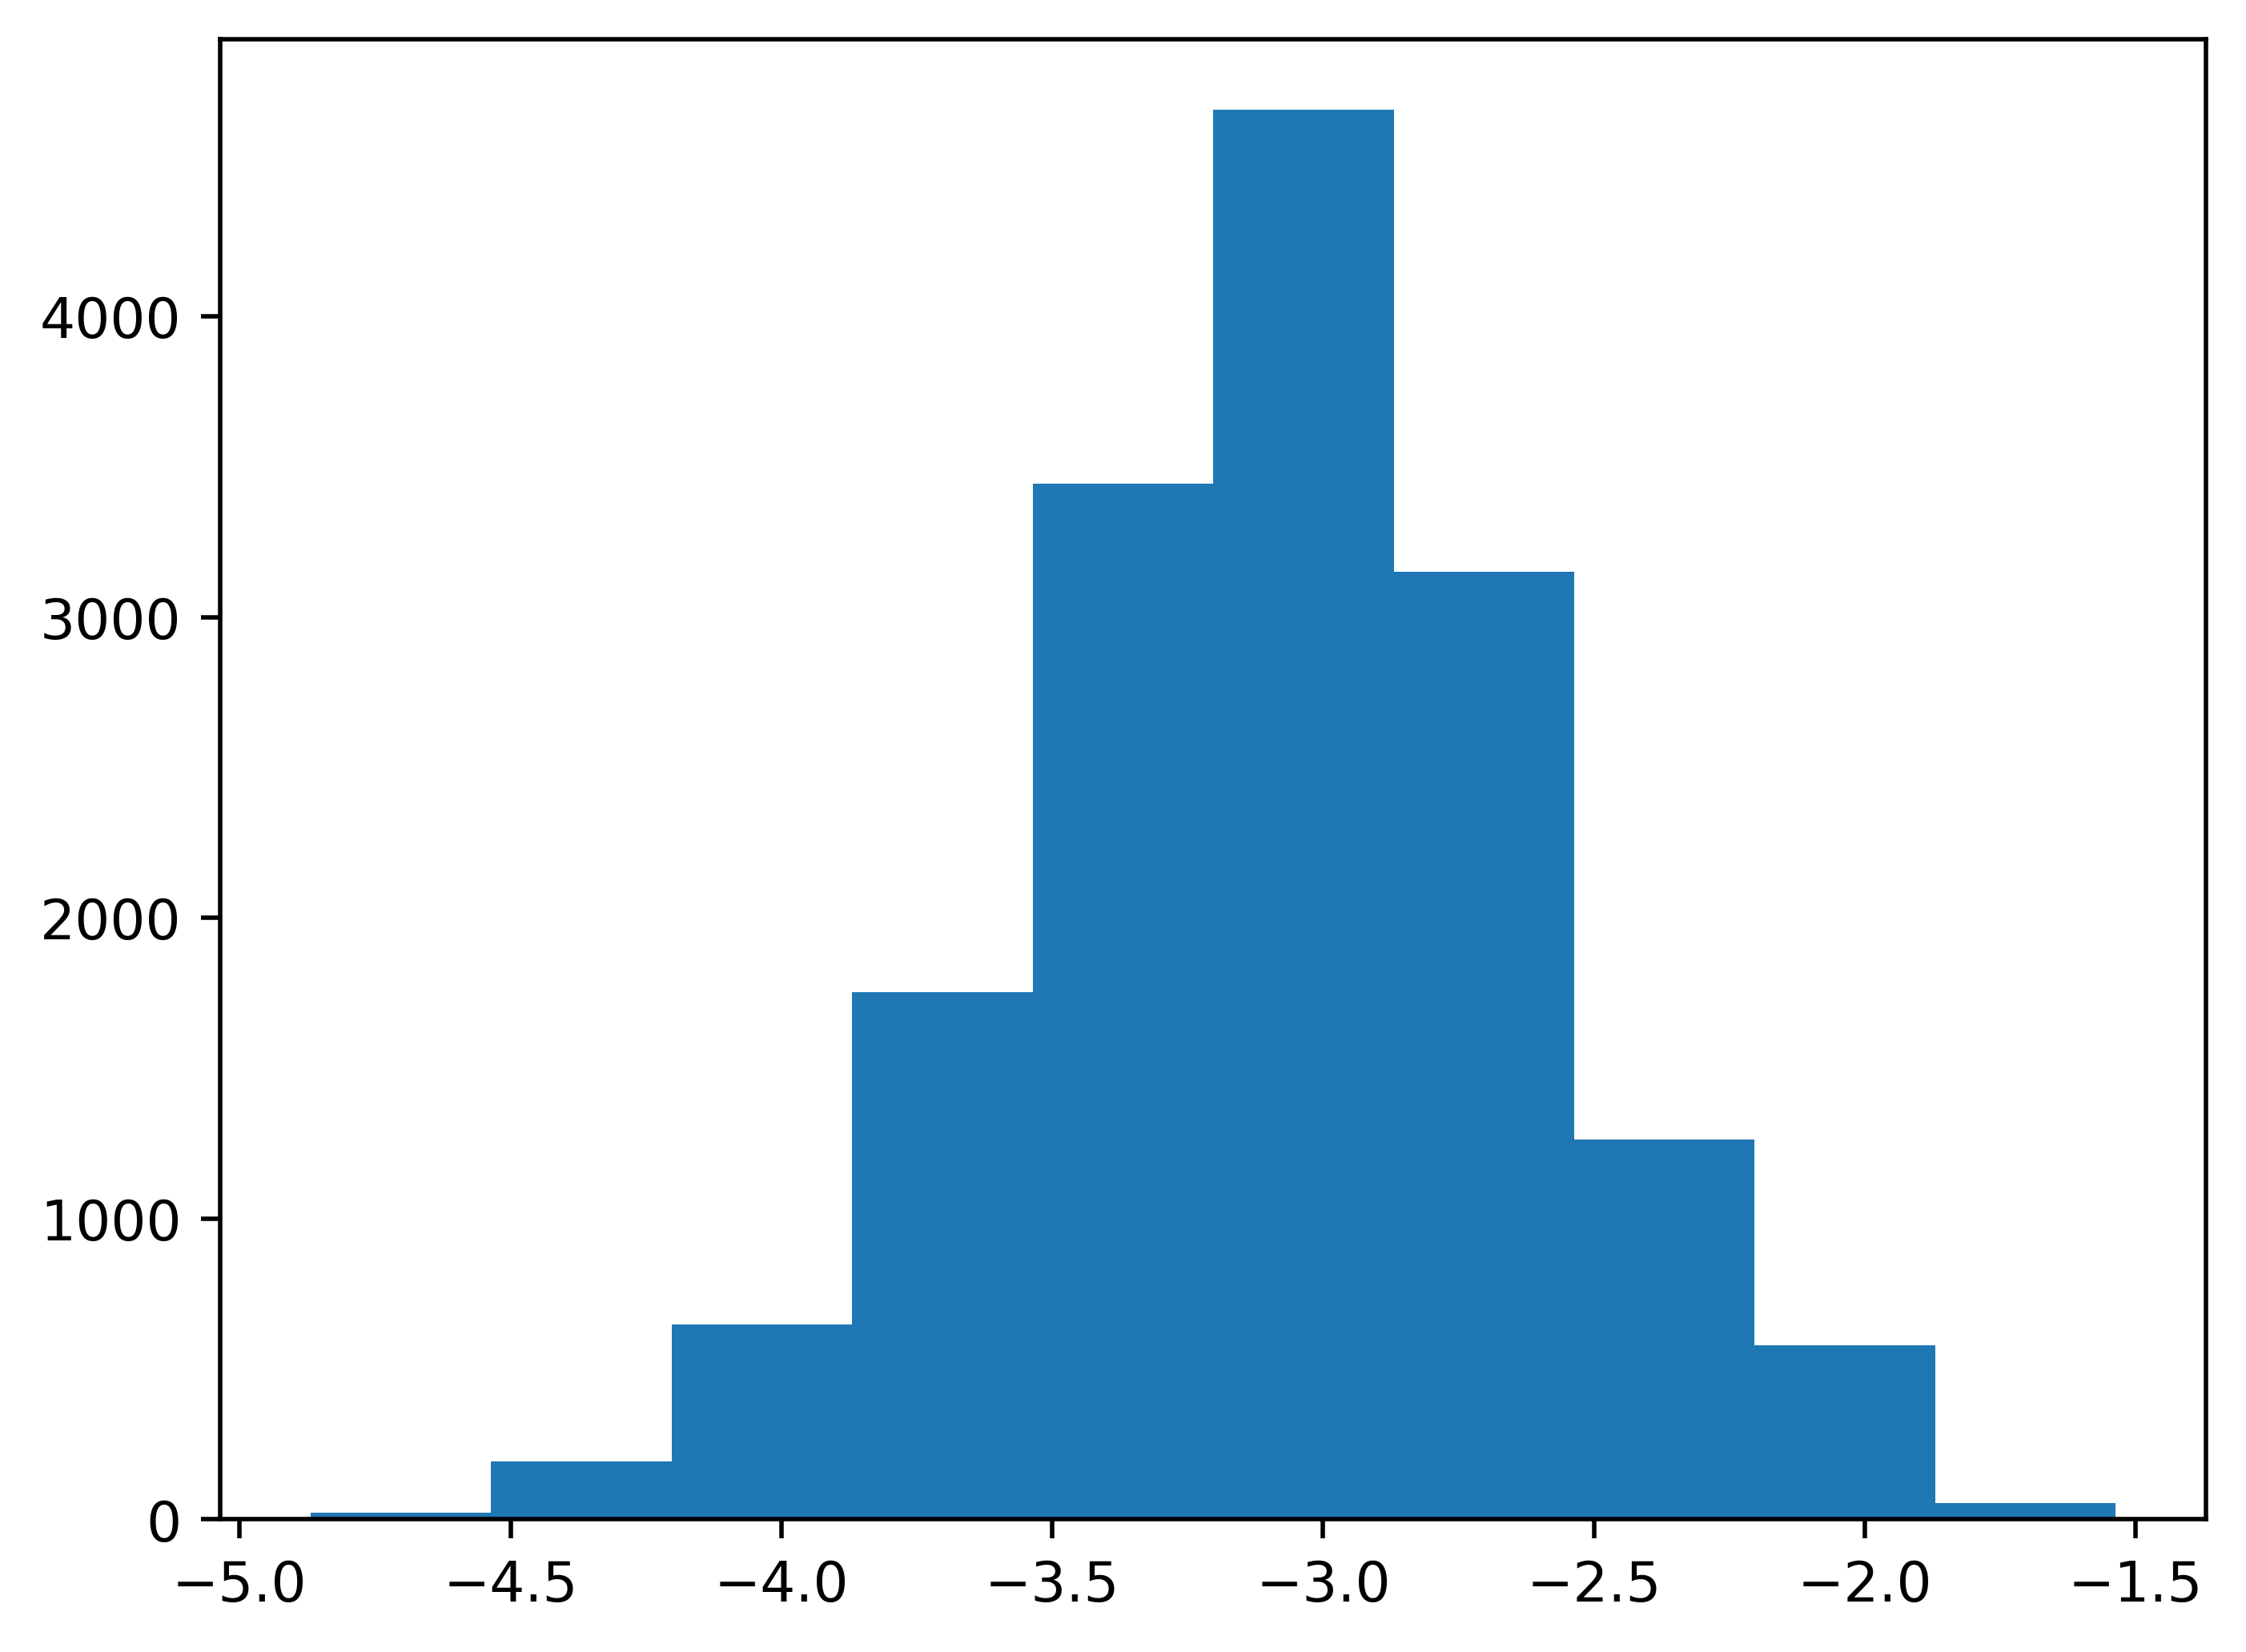

In [29]:
plt.hist(np.log10(std_real[std_real!=0]))

In [1]:
10**-5

1e-05

In [14]:
count.max()

255621.0

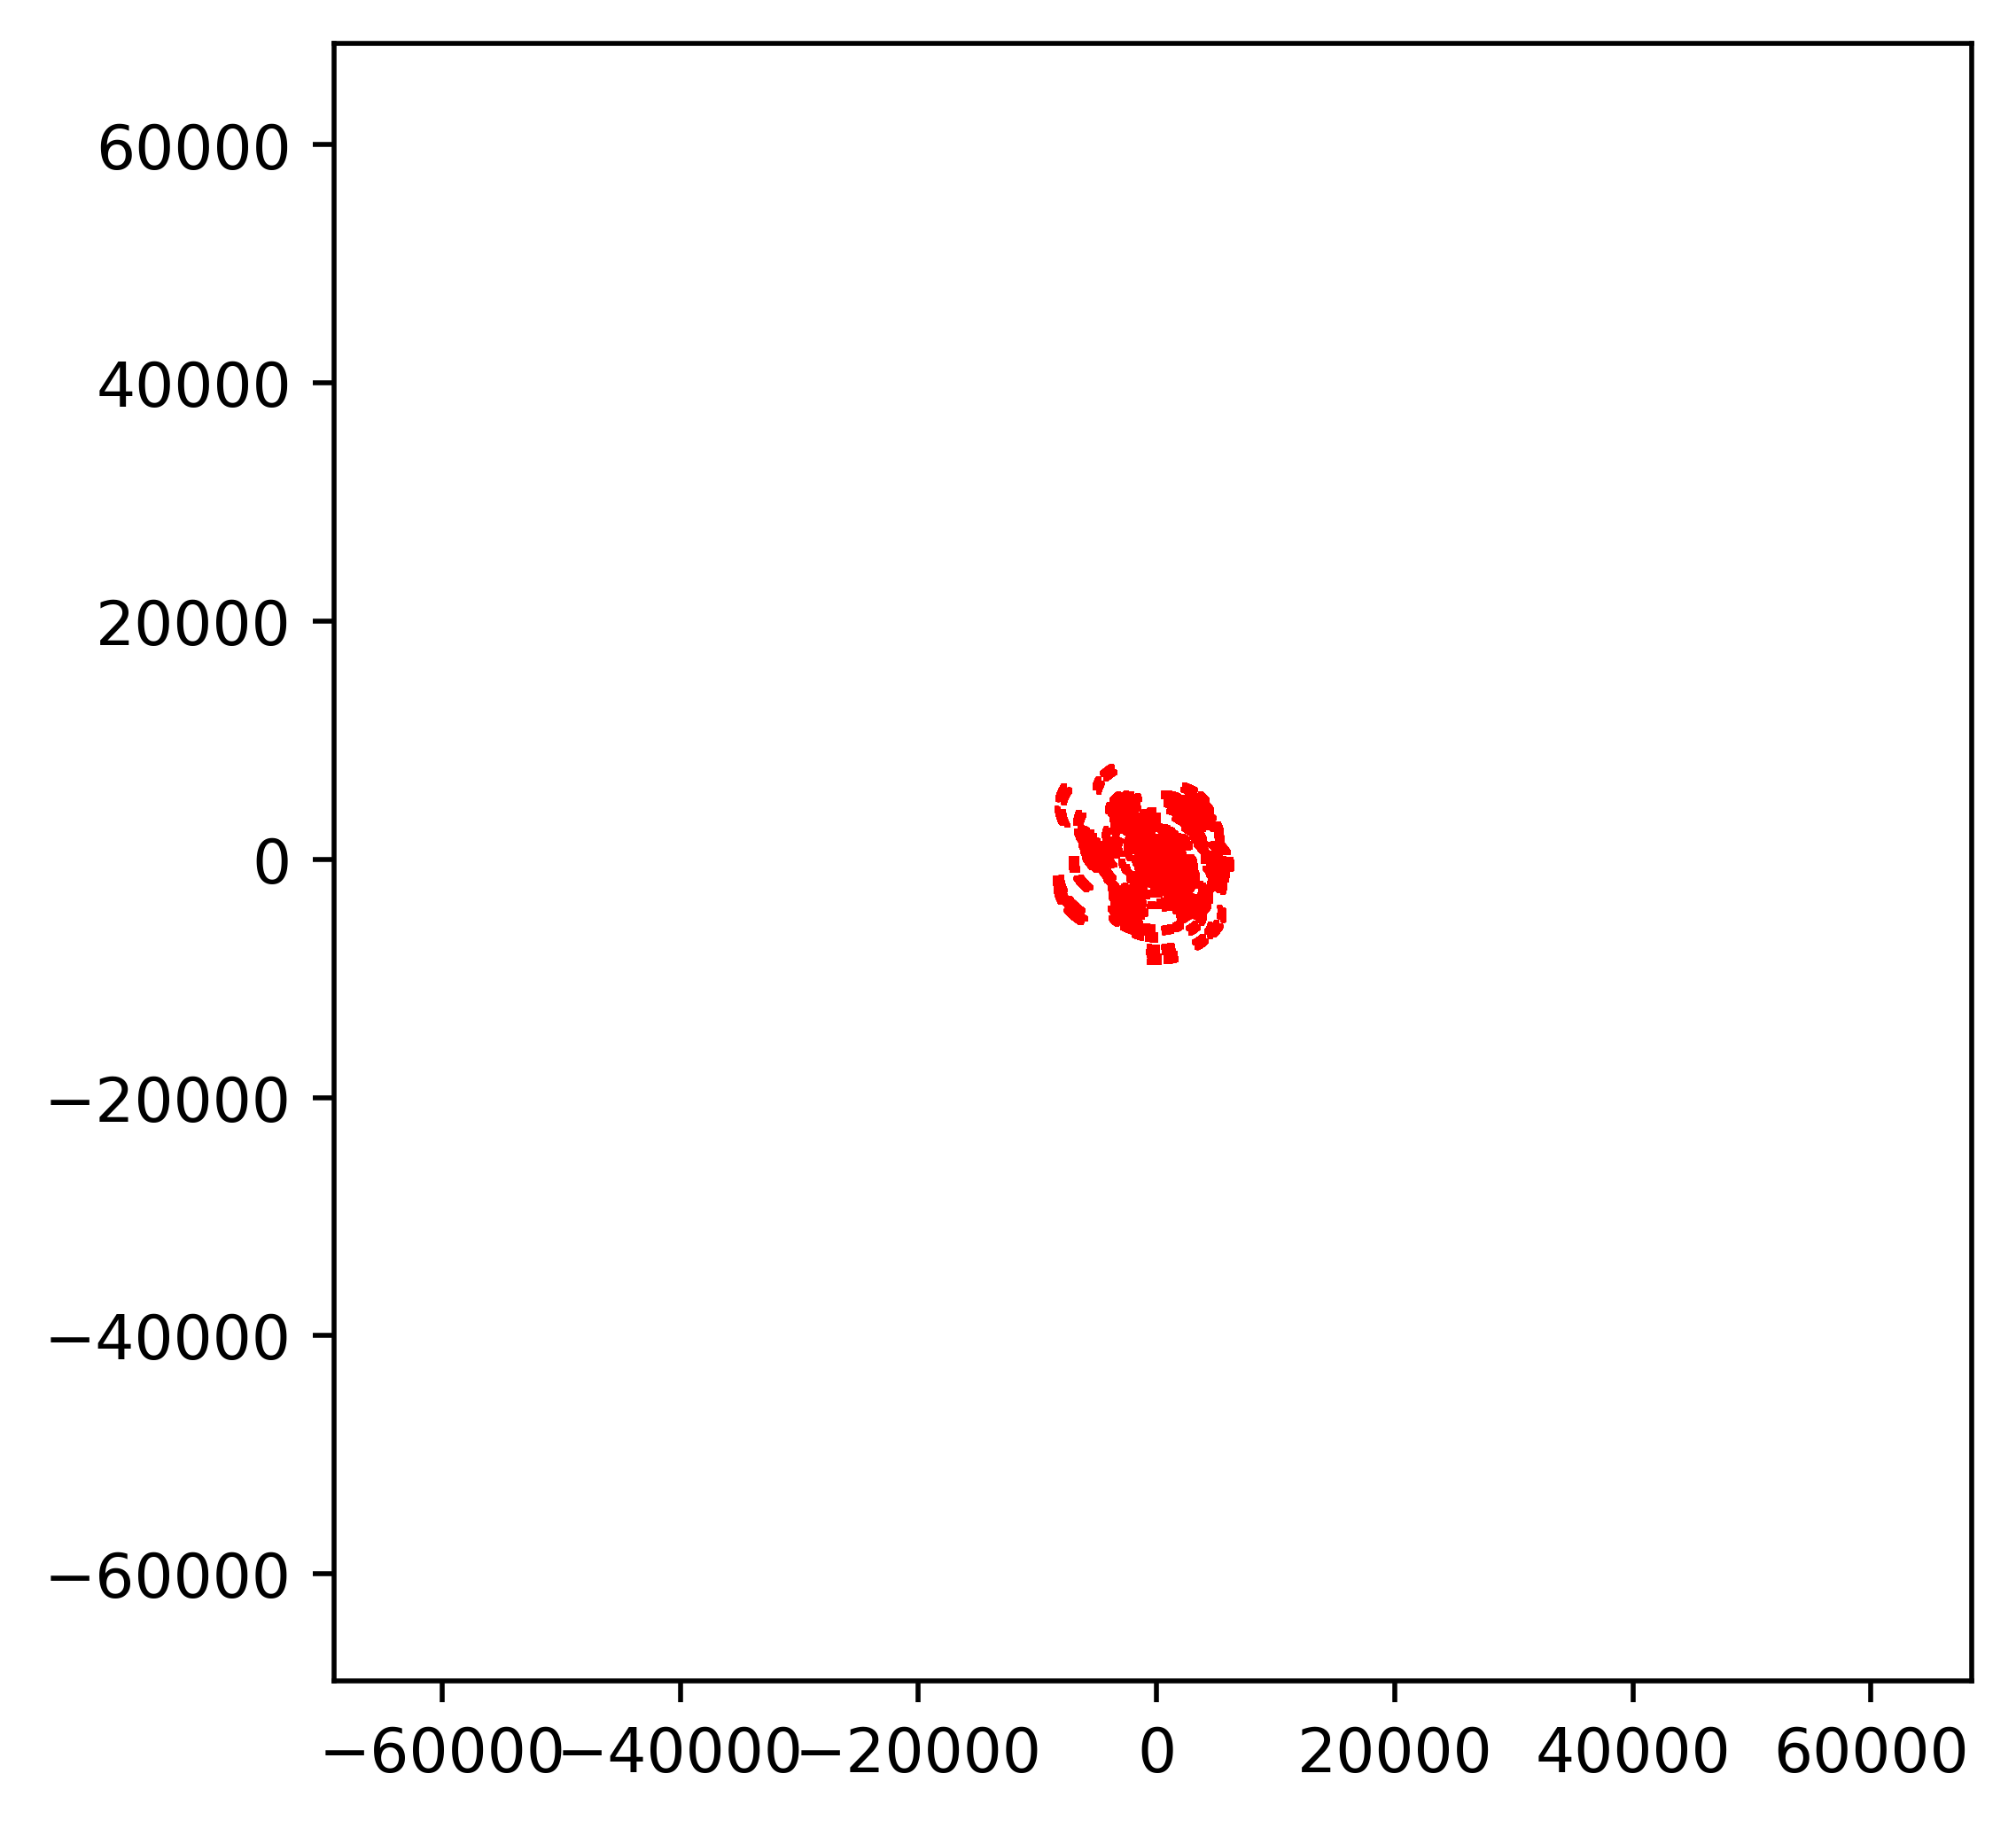

In [16]:
pixel_scale = 0.0015 # arcsec
coords = coordinates.GridCoords(cell_size=pixel_scale, npix=256)
bin_x = coords.u_edges
bin_y = coords.v_edges

plt.scatter(u, v, s=0.5, rasterized=True, linewidths=0.0, c="r")

# for x_coord in coords.u_edges: 
#     plt.axvline(x = x_coord, color = "gray", linestyle = "-")

# for y_coord in coords.v_edges:
#     plt.axhline(y =y_coord, color = "gray", linestyle = "-")

# plt.xlim([u.min(), u.max()])
# plt.ylim([v.min(), v.max()])
plt.gca().set_aspect("equal")

In [15]:
bin_x.max()

68486.3614492312

In [ ]:
coords.u

In [33]:
mask = count!=0
count = count[mask]

In [35]:
count.min()

8.0

In [28]:
mask

(array([0, 0, 0, ..., 7, 7, 7], dtype=int64),
 array([  0,   0,   0, ..., 255, 255, 255], dtype=int64),
 array([  0,   1,   2, ..., 253, 254, 255], dtype=int64))

In [22]:
std_bin = std_bin_real[~np.isnan(std_bin_real)]

In [24]:
std_bin.shape

(3216,)

In [16]:
std_bin_real.shape

(8, 4096, 4096)

In [11]:
np.log()

(134217728,)

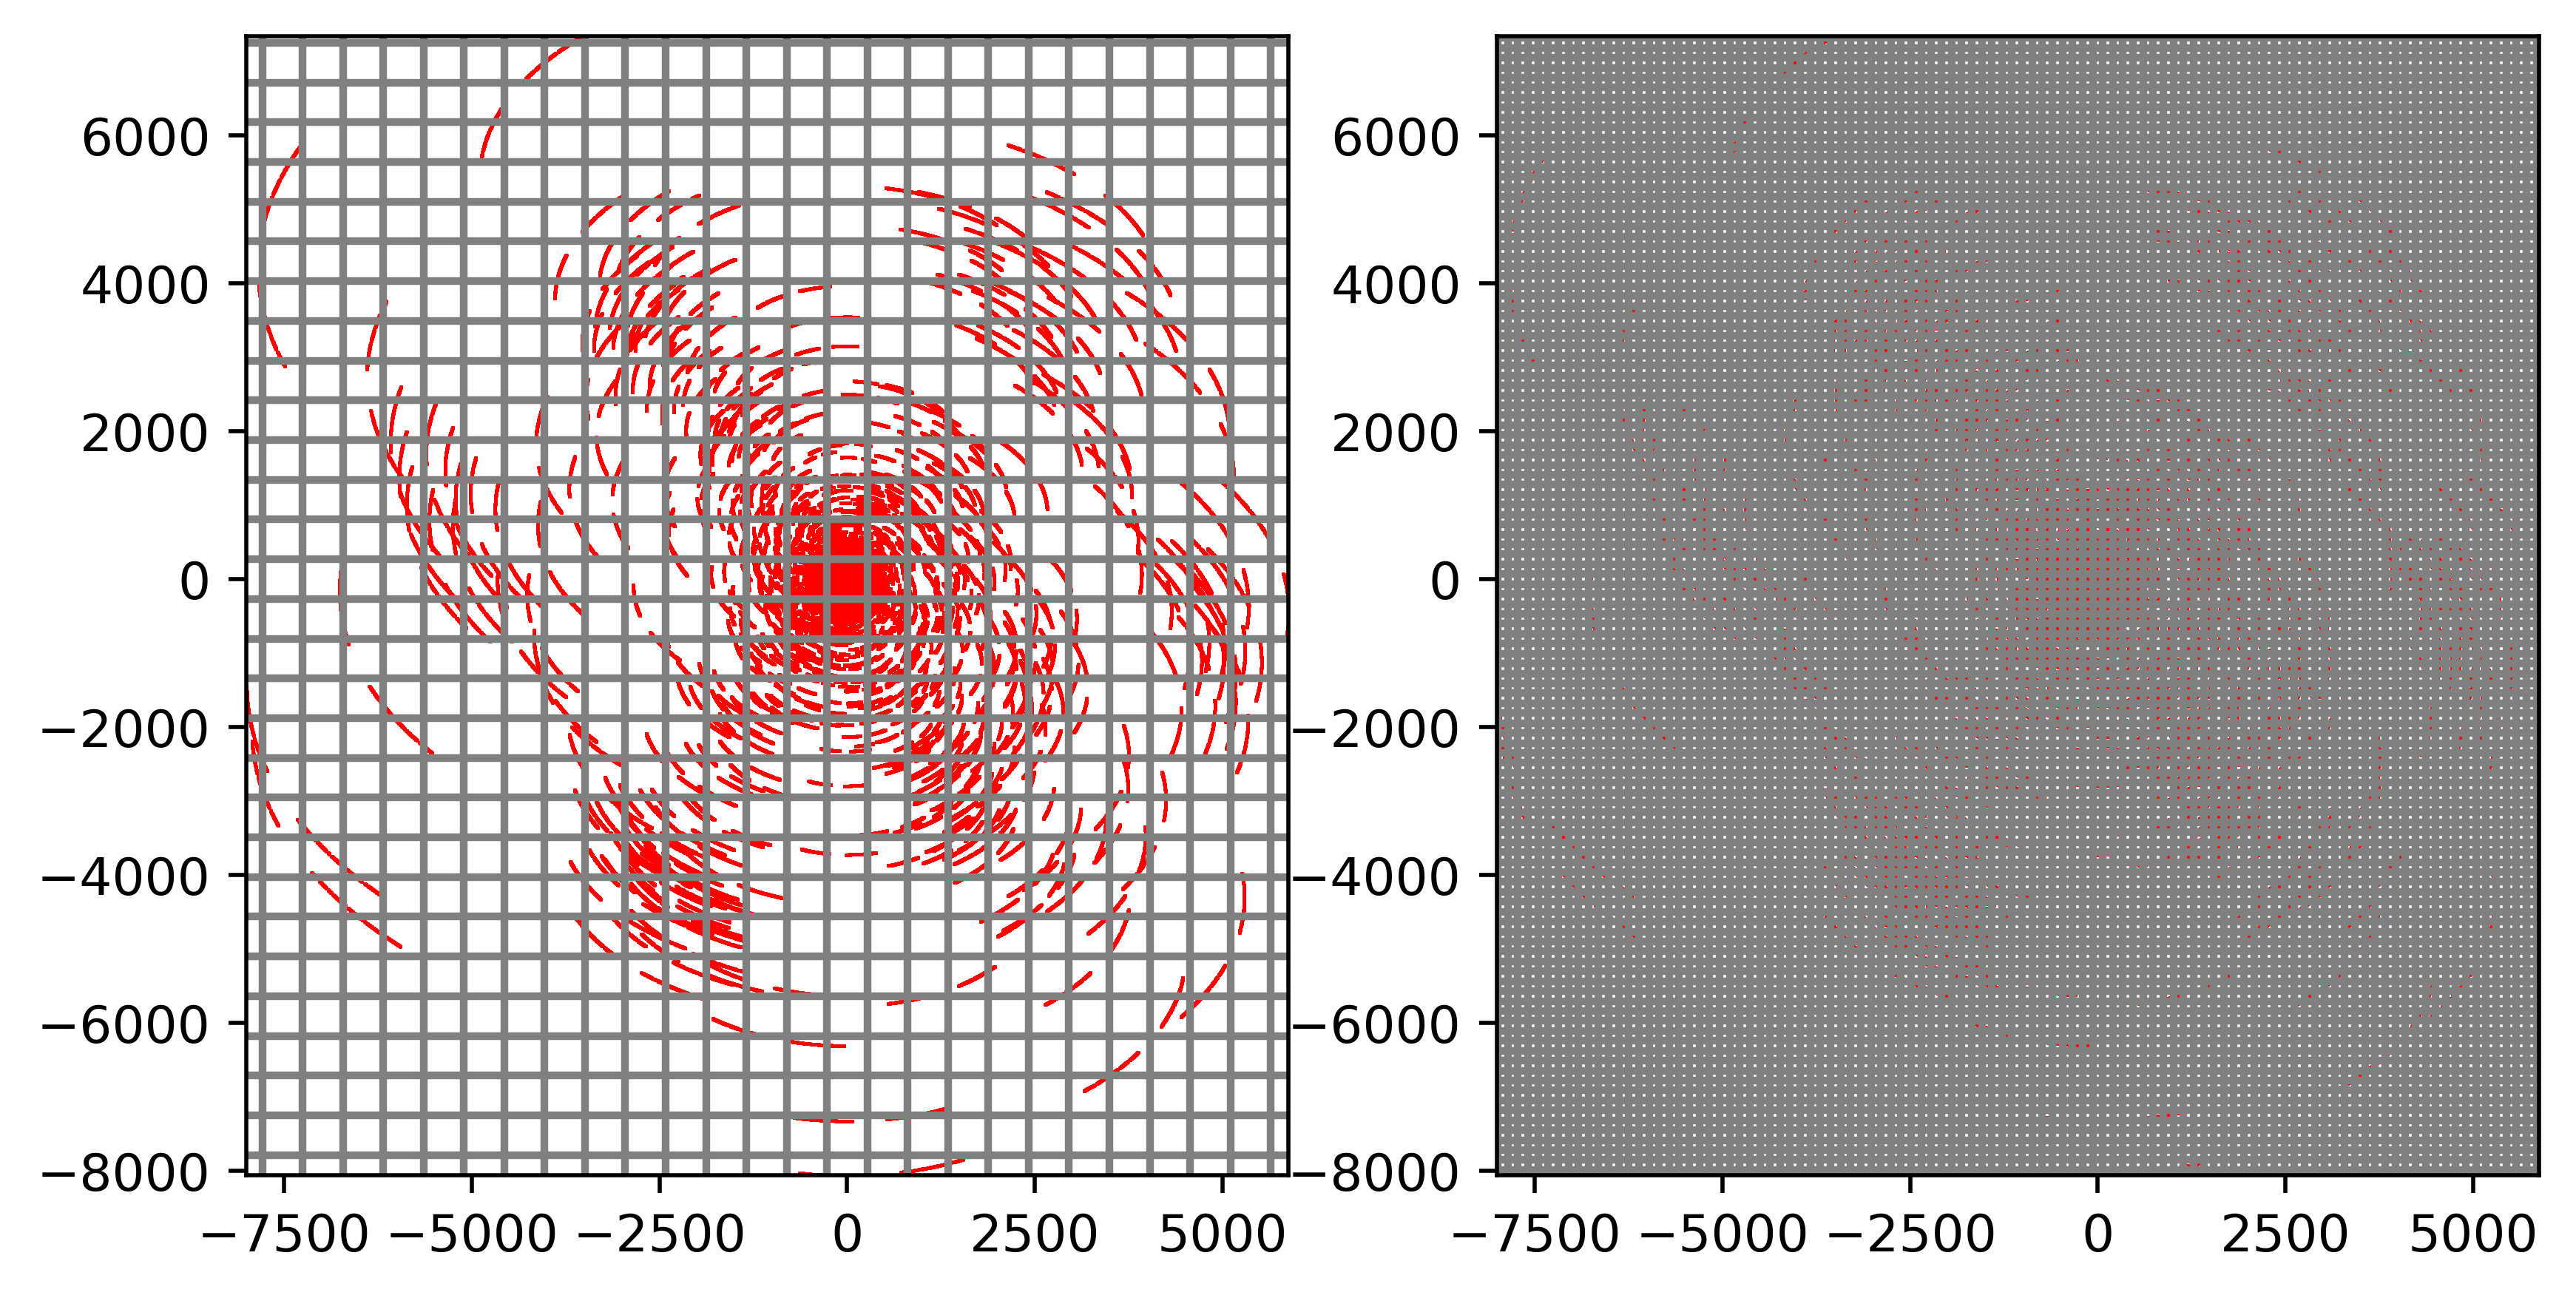

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(4*2, 4))
for i, npix in enumerate([256, 256*4]):
    coords = coordinates.GridCoords(cell_size=pixel_scale, npix=npix)
    bin_x = coords.u_edges
    bin_y = coords.v_edges

    axs[i].scatter(u, v, s=0.5, rasterized=True, linewidths=0.0, c="r")
    for x_coord in coords.u_edges: 
        axs[i].axvline(x = x_coord, color = "gray", linestyle = "-")

    for y_coord in coords.v_edges:
        axs[i].axhline(y =y_coord, color = "gray", linestyle = "-")
    
    axs[i].set(xlim = [u.min(), u.max()], ylim = [v.min(), v.max()])

537.1479329351569


(-8065.544561009035, 7337.15721197183)

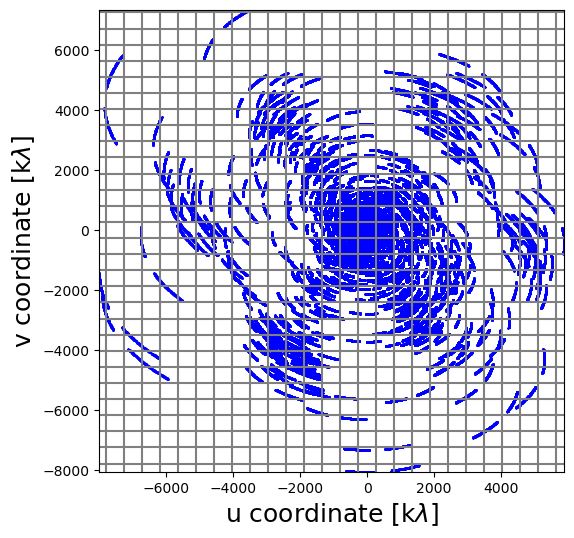

In [43]:
from mpol import coordinates
pixel_scale = 0.0015 # arcsec
npix = 256
coords = coordinates.GridCoords(cell_size=pixel_scale, npix=npix)

print(np.diff(coords.u_edges)[0])

plt.figure(figsize=(6, 6))
plt.scatter(u, v, s=0.1, color="b")

# Add custom vertical gridlines
for x_coord in coords.u_edges:
    plt.axvline(x=x_coord, color='gray', linestyle='-')

# Add custom horizontal gridlines
for y_coord in coords.v_edges:
    plt.axhline(y=y_coord, color='gray', linestyle='-')

plt.ylabel(r"v coordinate [k$\lambda$]", fontsize=18)
plt.xlabel(r"u coordinate [k$\lambda$]", fontsize=18)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())

In [28]:
pixel_scale = 0.0015 # arcsec
npix = 512
coords = coordinates.GridCoords(cell_size=pixel_scale, npix=npix)

channel = 6
imgs = []
beams = []
for channel in range(8):
    imager = DirtyImager(
        coords=coords,
        uu=u,
        vv=v,
        weight=weight,
        data_re=vis_real[channel],
        data_im=vis_imag[channel], # Need to take the complex conjugate of CASA visibilities for MPo convention. See https://mpol-dev.github.io/MPoL/ci-tutorials/gridder.html
    )
    img, beam = imager.get_dirty_image(weighting="briggs", robust=0.05)
    imgs.append(img)
    beams.append(beam)

c:\Users\noedi\anaconda3\lib\site-packages\mpol\gridding.py:863: RuntimeWarning: Visibility scatter exceeds ``max_scatter``:1.2, indicating a potential problem with data weights. Consider inspecting weights using CASA tools before exporting visibilities for use with MPoL. Median real scatter: 1.5340799714004738 x sigma. Median imag scatter: 1.5420599837322486 x sigma.
  warnings.warn(
c:\Users\noedi\anaconda3\lib\site-packages\mpol\gridding.py:863: RuntimeWarning: Visibility scatter exceeds ``max_scatter``:1.2, indicating a potential problem with data weights. Consider inspecting weights using CASA tools before exporting visibilities for use with MPoL. Median real scatter: 1.4218970425475275 x sigma. Median imag scatter: 1.424355462740299 x sigma.
  warnings.warn(
c:\Users\noedi\anaconda3\lib\site-packages\mpol\gridding.py:863: RuntimeWarning: Visibility scatter exceeds ``max_scatter``:1.2, indicating a potential problem with data weights. Consider inspecting weights using CASA tools b

In [ ]:
np.savez("../../dirty_image.npz", **{
    np.array(imgs), 
    np.array(beams)
})

NameError: name 'binned_statistic_2d' is not defined

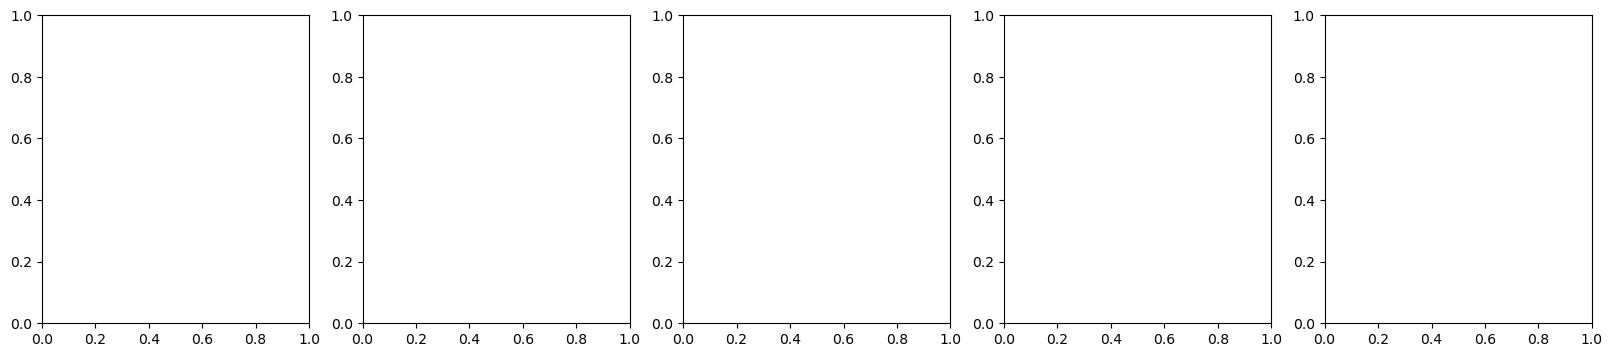

In [31]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for i, npix in enumerate([256, 512, 1024, 2048, 4096]):
    coords = coordinates.GridCoords(cell_size=pixel_scale, npix=npix)
    bin_x = coords.u_edges
    bin_y = coords.v_edges
    std_bin_real, edgex, edgey, binumber = binned_statistic_2d(u, v, vis_real, "std", (bin_x, bin_y))
    std_bin_imag, edgex, edgey, binumber = binned_statistic_2d(u, v, vis_imag,  "std", (bin_x, bin_y))

    count, *_ = binned_statistic_2d(u, v, vis_real, "count", (bin_x, bin_y))
    count.shape

    std_real = std_bin_real / (count + 1)
    std_imag = std_bin_imag / (count + 1)
    
    axs[i].hist(np.log10(std_real[std_real != 0].ravel()), bins=20)
    axs[i].set_ylabel("Count")
    axs[i].set_xlabel("log10 standard deviation vis")
    axs[i].set_title(f"{npix} pixels")

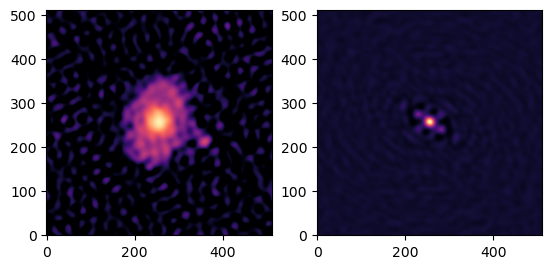

In [29]:
fig, axs = plt.subplots(1, 2)

dirty_image = np.array(imgs).mean(axis = 0)
norm = ImageNormalize(dirty_image, vmin = 0, stretch = AsinhStretch())
axs[0].imshow(imgs[0][0], cmap = "magma", origin = "lower", norm = norm)
axs[1].imshow(beams[0][0], cmap = "magma", origin = "lower")

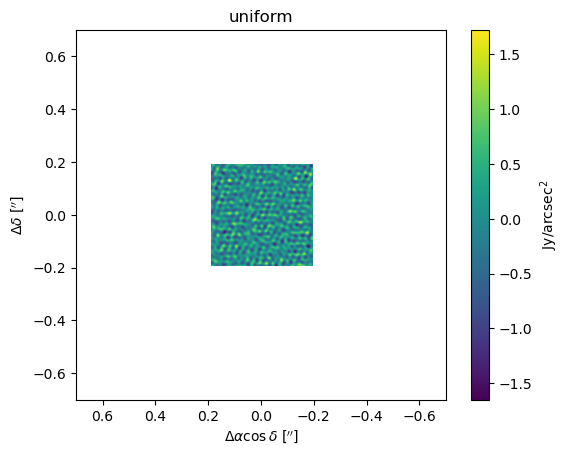

In [19]:
_ = image_and_plot(weighting="uniform")

In [20]:
_ = image_and_plot(weighting="natural")

ValueError: zero-size array to reduction operation minimum which has no identity

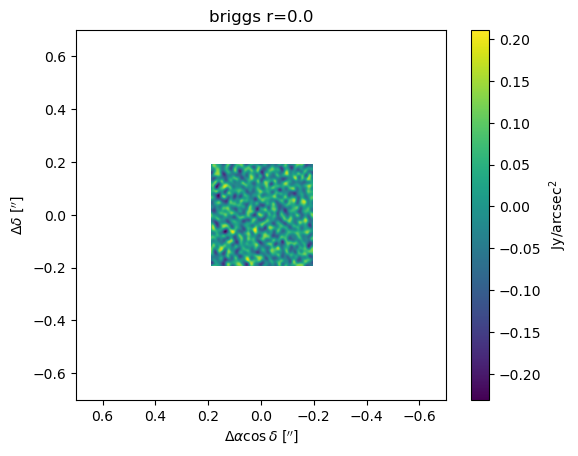

In [22]:
_ = image_and_plot(weighting="briggs", robust=0.0)